In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

In [77]:
# Discretizamos el espacio
Xmin, Xmax, NpointsX = 0.,40.,51
Ymin, Ymax, NpointsY = 0.,40.,51

x = np.linspace(Xmin,Xmax,NpointsX)
y = np.linspace(Xmin,Xmax,NpointsY)

In [78]:
def h1(y):
    return 75.

def h2(y):
    return 50.

def h3(x):
    return 100.

def h4(x):
    return 10.

In [79]:
def InitT():
    
    T = np.zeros( (NpointsX,NpointsY) )
    
    # Fijando las fronteras
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [80]:
T = InitT()

In [81]:
print(T)

[[100.  75.  75. ...  75.  75.  10.]
 [100.   0.   0. ...   0.   0.  10.]
 [100.   0.   0. ...   0.   0.  10.]
 ...
 [100.   0.   0. ...   0.   0.  10.]
 [100.   0.   0. ...   0.   0.  10.]
 [100.  50.  50. ...  50.  50.  10.]]


In [82]:
def GetGaussSeidel(T, Nit = int(1e5), tolerancia = 1e-2):
    
    itmax = 0
    
    for it in tqdm( range(Nit) ):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )
                r = (tmp - T[i,j]) # Calculo la distancia entre j y j-1
                
                T[i,j] += r # Actualizar la matriz
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        if np.abs(dmax) < tolerancia:
            itmax = it
            break
            
    return T,itmax

In [83]:
T = InitT()
Tf1,itmax = GetGaussSeidel(T)
print(itmax)

  1%|          | 913/100000 [00:05<09:09, 180.41it/s]

913


In [84]:
def GetRelaxation(T, Nit = int(1e5), omega = 1.3, tolerancia = 1e-2):
    
    itmax = 0
    
    for it in tqdm( range(Nit) ):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )
                r = (tmp - T[i,j]) # Calculo la distancia entre j y j-1
                
                T[i,j] += omega*r # Actualizar la matriz
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        if np.abs(dmax) < tolerancia:
            itmax = it
            break
            
    return T,itmax

In [87]:
T = InitT()
Tf1,itmax = GetRelaxation(T, omega = 1.9)
print(itmax)

  0%|          | 52/100000 [00:00<09:35, 173.74it/s]

52


<IPython.core.display.Javascript object>


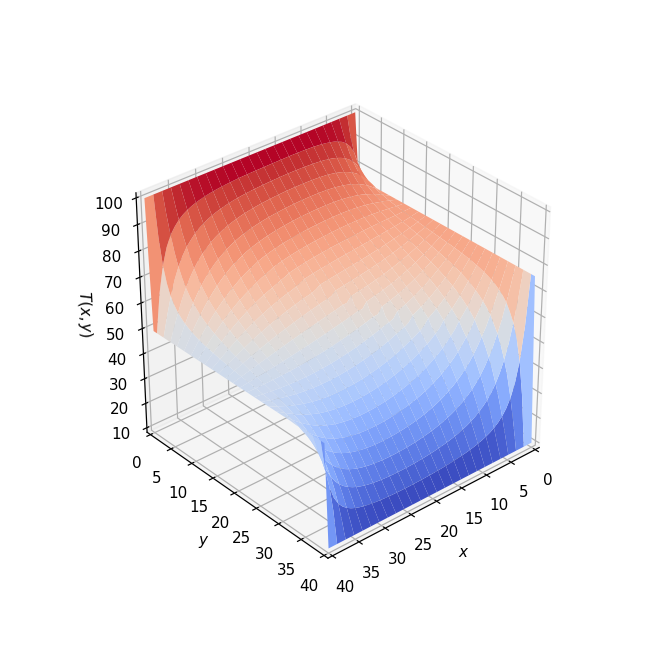

In [88]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection = '3d', elev = 14, azim = 35)

ax.set_xlim3d(0, 40)
ax.set_ylim3d(0, 40)

ax.set_xlabel('$x$', fontsize=10)
ax.set_ylabel('$y$', fontsize=10)
ax.set_zlabel('$T(x,y)$', fontsize=10)

X,Y = np.meshgrid(x,y)
ax.plot_surface(X,Y,Tf1.T,cmap=cm.coolwarm)